In [10]:
# This notebook aims to explore flight data focusing on airports and countries to uncover patterns, correlations, and insights.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import plotly.express as px

In [12]:
data = pd.read_csv('data.csv')
data.head()


,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Airbus A330|Airbu...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1320000.0,1320000.0,0%,2022-04-29 17:52:59
1,ALG,Algeria,AEP,Argentina,Airbus A318|Canadair RJ 1000|Boeing 787|Airbus...,multi,[Air France| Iberia| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1279.0,USD,1195000.0,1320000.0,-9%,2022-04-29 17:52:59
2,ALG,Algeria,AEP,Argentina,Airbus A320|Airbus A321|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1855|AF1855|AF1855|AF1855,2022-04-30 12:45:00,2022-05-01 10:15:00,1530,3,1284.0,USD,1248000.0,1320000.0,-5%,2022-04-29 17:52:59
3,ALG,Algeria,AEP,Argentina,Airbus A318|Airbus A320|Boeing 787|Airbus A320,multi,[Air France| LATAM],AF1491|AF1491|AF1491|AF1491,2022-04-30 14:30:00,2022-05-01 10:15:00,1425,3,1290.0,USD,1347000.0,1320000.0,2%,2022-04-29 17:52:59
4,ALG,Algeria,AEP,Argentina,Airbus A321neo|Boeing 777|Airbus A320,multi,[Lufthansa| LATAM],LH1317|LH1317|LH1317,2022-04-30 12:35:00,2022-05-01 10:15:00,1540,2,1347.0,USD,1381000.0,1320000.0,4%,2022-04-29 17:52:59


In [13]:
data.info()
data.describe(include='all')
# Analysis of the flight volumes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998866 entries, 0 to 998865
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   from_airport_code                998866 non-null  object 
 1   from_country                     998866 non-null  object 
 2   dest_airport_code                998866 non-null  object 
 3   dest_country                     998866 non-null  object 
 4   aircraft_type                    984952 non-null  object 
 5   airline_number                   998866 non-null  object 
 6   airline_name                     998866 non-null  object 
 7   flight_number                    998866 non-null  object 
 8   departure_time                   998866 non-null  object 
 9   arrival_time                     998866 non-null  object 
 10  duration                         998866 non-null  int64  
 11  stops                            998866 non-null  int64  
 12  pr

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
count,998866,998866,998866,998866,984952,998866,998866,998866,998866,998866,998866.000000,998866.000000,997513.000000,998866,9.939980e+05,9.104640e+05,910464,998866
unique,31,18,78,47,25675,185,11012,22064,4288,21164,NaN,NaN,NaN,1,NaN,NaN,987,1
top,YYZ,China,LHR,United States,Airbus A320|Airbus A320,multi,[Lufthansa],ET706|ET706|ET706,2022-05-29 10:50:00,2022-08-29 10:15:00,NaN,NaN,NaN,USD,NaN,NaN,0%,2022-04-29 17:52:59
freq,55056,125384,20974,207877,22055,642428,58537,4327,2504,1146,NaN,NaN,NaN,998866,NaN,NaN,41841,998866
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1468.213762,1.654926,1763.370116,NaN,1.111010e+06,8.626045e+05,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,705.799677,0.652485,1985.988209,NaN,9.876891e+05,5.228906e+05,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,0.000000,9.000000,NaN,4.300000e+04,5.300000e+04,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,973.000000,1.000000,621.000000,NaN,5.220000e+05,4.100000e+05,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1410.000000,2.000000,1189.000000,NaN,9.560000e+05,8.760000e+05,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1880.000000,2.000000,2127.000000,NaN,1.367000e+06,1.184000e+06,NaN,NaN


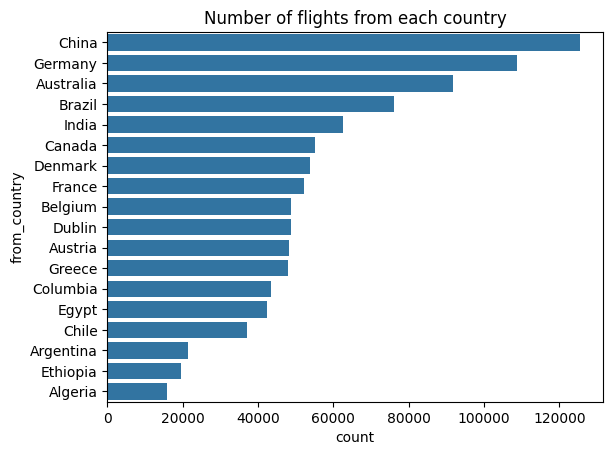

In [20]:
# Analysis of the flight volumes

sns.countplot(data=data, y='from_country', order=data['from_country'].value_counts().index)
plt.title('Number of flights from each country')
plt.show()

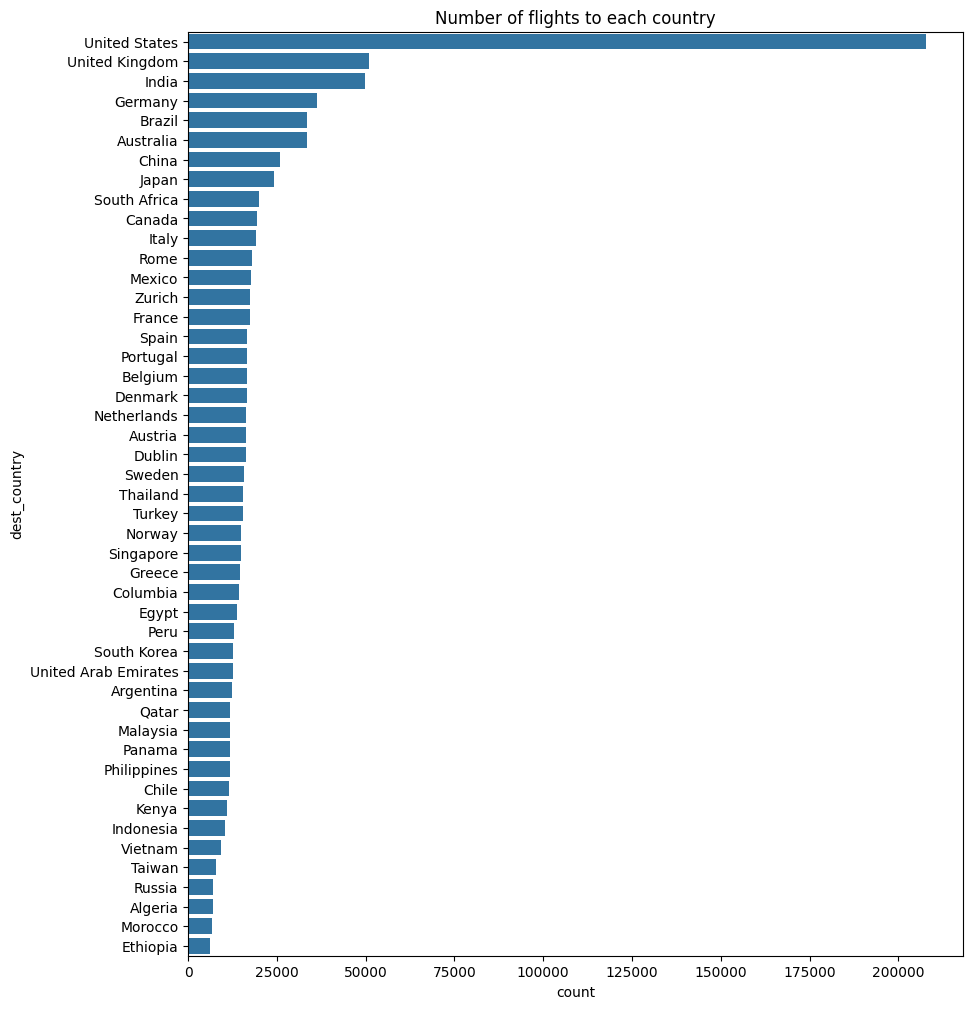

In [18]:
# Analysis of the destinations

plt.figure(figsize=(10,12))
sns.countplot(data=data, y='dest_country', order=data['dest_country'].value_counts().index)
plt.title('Number of flights to each country')
plt.show()
